Business use case
A retail manager wants to understand sales trends and product performance.

Questions to solve

Monthly sales trend

Top 10 products by revenue

Category-wise contribution to sales

Buying patterns by age and gender?

In [1]:
import numpy as np
import pandas as pd

loading the dataset

In [2]:
retail_df = pd.read_csv(r'retail_sales_dataset.csv')


checking the dataset by loading first 5 rows

In [3]:
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


basic info about the dataset

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


there are no null values in the dataset

getting the basic statistics of the data

In [5]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


1. Top 10 products sold by quantiy and amt

In [6]:
top_10_qty = retail_df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
top_10_qty

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

Clothing product type is the top selling in terms of quantity

In [7]:
top_10_sales = retail_df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_10_sales

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

though closing is most sold by qty, electronics is the most sold by value

2. Monthly Trend

converting date col into datetime datatype

In [8]:
retail_df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [9]:
retail_df=retail_df.astype({'Date':'datetime64'})

In [10]:
retail_df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

creating year and month cols

In [11]:
retail_df = retail_df.assign(year = retail_df['Date'].dt.year,
                 month = retail_df['Date'].dt.month,
                    year_month = retail_df['Date'].dt.strftime('%Y-%m'))

retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,year_month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,2023-05


In [12]:
monthly_trend = retail_df.pivot_table(index='year_month',columns='Product Category',values='Total Amount',aggfunc='sum')
monthly_trend

Product Category,Beauty,Clothing,Electronics
year_month,,,
2023-01,12430.0,13125.0,9895.0
2023-02,14035.0,14560.0,15465.0
2023-03,10545.0,15065.0,3380.0
2023-04,11905.0,13940.0,8025.0
2023-05,12450.0,17455.0,23245.0
2023-06,10995.0,10170.0,15550.0
2023-07,16090.0,8250.0,11125.0
2023-08,9790.0,12455.0,14715.0
2023-09,6320.0,9975.0,7325.0


plotting the sales trend for each product

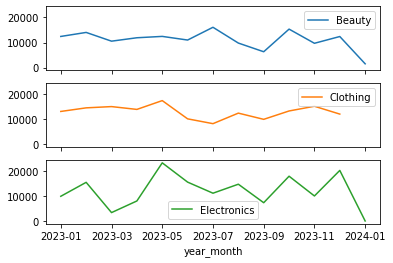

In [13]:
monthly_trend.plot(subplots=True,
                  sharey=True);

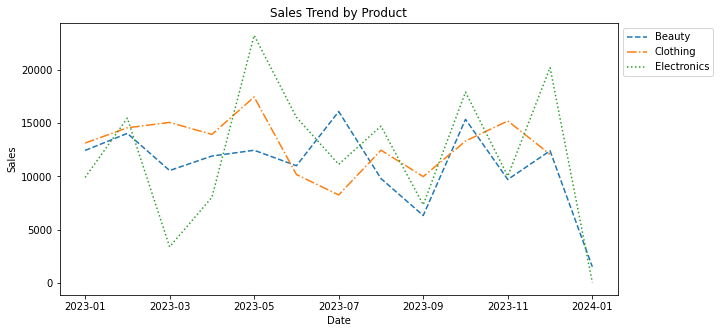

In [14]:
monthly_trend.plot(figsize=(10,5),
                  style=['--','-.',':'],
                  title = 'Sales Trend by Product',
                  xlabel = 'Date',
                  ylabel = 'Sales',
                ).legend(bbox_to_anchor=(1,1));

1.electronics saw a dip in sales around 2023 march and saw asignificant spike around 2023 april

2.beauty saw its lowest around 2023 sep

3.clothing saw its spike around 2023 may

overall sales trend

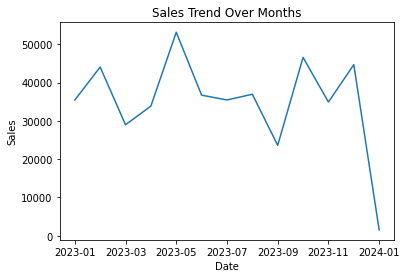

In [15]:
(retail_df.groupby('year_month')['Total Amount'].sum()
    .plot(title = 'Sales Trend Over Months',
         xlabel = 'Date',
         ylabel = 'Sales')
);

3. Category wise contribution to sales

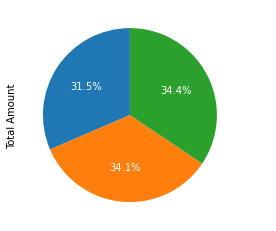

In [16]:
(retail_df.groupby('Product Category')['Total Amount'].sum()
    .plot.pie(startangle=90,labels = retail_df['Product Category'],autopct='%1.1f%%',
             textprops = {'color':'w'})
);

almost all the categories contribute equally towards the sale. But electronics highest contributor with 34.4% of total sales

4. Buying patterns by age and gender

<AxesSubplot:xlabel='Gender'>

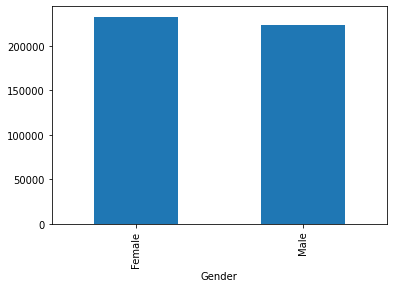

In [17]:
retail_df.groupby(['Gender'])['Total Amount'].sum().plot.bar()

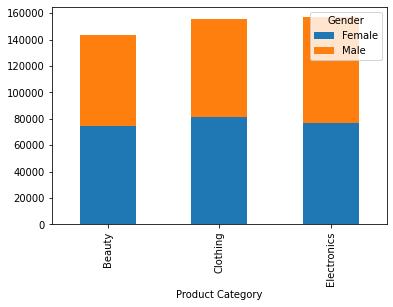

In [28]:
(retail_df.pivot_table(index='Product Category',columns='Gender',values='Total Amount',aggfunc='sum').
    plot.bar(stacked=True)
);

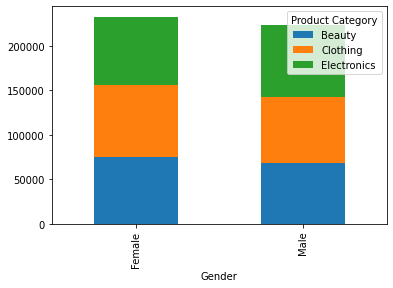

In [29]:
(retail_df.pivot_table(index='Gender',columns='Product Category',values='Total Amount',aggfunc='sum').
    plot.bar(stacked=True)
);

buying patterns by gender is similar for both male and female with female has high buying

<AxesSubplot:ylabel='Frequency'>

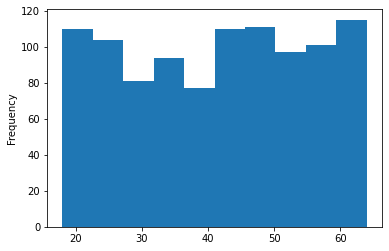

In [57]:
retail_df['Age'].plot.hist()

almost all age groups has similar buying pattern

<AxesSubplot:xlabel='Age', ylabel='Total Amount'>

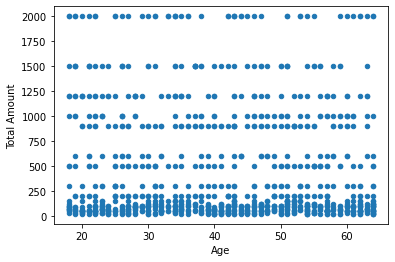

In [67]:
retail_df.plot.scatter(x='Age',y='Total Amount')

creating age bucket


In [74]:
retail_df['Age group']=pd.cut(retail_df['Age'],bins=[20,30,40,50,60,70,80])
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,year_month,Age group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,2023-11,"(30, 40]"
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,2023-02,"(20, 30]"
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,2023-01,"(40, 50]"
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,2023-05,"(30, 40]"
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,2023-05,"(20, 30]"


<AxesSubplot:xlabel='Age group'>

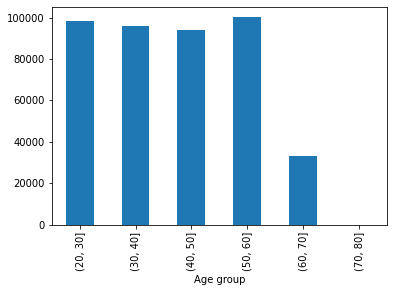

In [76]:
retail_df.groupby('Age group')['Total Amount'].sum().plot.bar()

the buying pattern across age group is also similar for all age buckets except 60-70

**Conclusions**

1. The sales trend for beauty and clothing are uniform over the months. Electronics saw dip and spike across over the months.
2. Overall sales saw a spike in may
3. Clothing is the most selling product category by quantity
4. Electronics is the most selling product category by total amount. Recommended to have stock of electronics
5. Male and Female has similar buying patterns across products with female has more buying
6. buying age distribution is also similar for all the age groups apart from 60-70 age group
7. 